In [6]:

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as snr
from scipy import stats


# Load data

In [7]:
#load data

starbucks=pd.read_csv('./starbucks_drinkMenu_expanded.csv')
starbucks.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total_Fat,Trans_Fat(g),Saturated_Fat(g),Sodium(mg),Total_Carbohydrates(g),Cholesterol(mg),Dietary Fibre (g),Sugar,Protein,Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


# Basic Look at the data

In [8]:

starbucks.shape
#242 rows and 18 columns


(242, 18)

In [72]:
type(starbucks)

pandas.core.frame.DataFrame

In [9]:
starbucks.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total_Fat', 'Trans_Fat(g) ', 'Saturated_Fat(g)', ' Sodium(mg)',
       ' Total_Carbohydrates(g) ', 'Cholesterol(mg)', ' Dietary Fibre (g)',
       ' Sugar', ' Protein', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [85]:
# finding null values
pd.isnull("starbucks")

False

In [73]:
#find min and max of each of the column
starbucks.describe()

,Calories,Trans_Fat(g),Saturated_Fat(g),Sodium(mg),Total_Carbohydrates(g),Cholesterol(mg),Dietary Fibre (g),Sugar,Protein
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512
std,102.863303,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000
50%,185.000000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000
75%,260.000000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000


In [44]:
starbucks['Cholesterol(mg)'].describe()

count    242.000000
mean      35.991736
std       20.795186
min        0.000000
25%       21.000000
50%       34.000000
75%       50.750000
max       90.000000
Name: Cholesterol(mg), dtype: float64

# Which Product has maximum calories?

In [52]:
Max_calories=starbucks.loc[starbucks['Calories']==510]
print('Product having maximum calories is',Max_calories['Beverage'])

Product having maximum calories is 84    White Chocolate Mocha (Without Whipped Cream)
Name: Beverage, dtype: object


# Which Product has maximum Cholesterol?

In [54]:
Max_Cholesterol=starbucks.loc[starbucks['Cholesterol(mg)']==90]

print('Product having maximum Cholesterol is',Max_Cholesterol['Beverage'])

Product having maximum Cholesterol is 214    Java Chip (Without Whipped Cream)
215    Java Chip (Without Whipped Cream)
Name: Beverage, dtype: object


In [55]:
#Alternate Method
#locate product with highest Cholesterol
starbucks['Cholesterol(mg)'].idxmax()

214

In [61]:
#Print name of the product
print('Product having maximum cholesterol is',starbucks.at[214,'Beverage'])

Product having maximum cholesterol is Java Chip (Without Whipped Cream)


# Find the product having maximum calories and minimum Cholesterol


In [58]:
starbucks['Calories'].idxmax()

84

In [66]:
starbucks['Cholesterol(mg)'].idxmin()

0

In [71]:
print('Product having maximum calories is',starbucks.at[84,'Beverage'],'Product having minimum Cholesterol is',starbucks.at[0,'Beverage'],sep="\n")

Product having maximum calories is
White Chocolate Mocha (Without Whipped Cream)
Product having minimum Cholesterol is
Brewed Coffee


# Find number Products having more than 400 calories and more than 60 grms of cholesterol

In [84]:
cal400=starbucks.loc[starbucks['Calories']>400]
len(cal400)
cho_60=starbucks.loc[starbucks['Cholesterol(mg)']>60]
len(cho_60)
print('Number Products having more than 400 calories are:',len(cal400),'and more than 60 grms of cholesterol are: ',len(cho_60))

number Products having more than 400 calories are: 7 and more than 60 grms of cholesterol are:  32


In [91]:
# alternate way
cal_400=starbucks.apply(lambda x: True if x['Calories']>400 else False, axis=1)
countcal=len(cal_400[cal_400==True].index)
cho60=starbucks.apply(lambda x: True if x['Cholesterol(mg)']>60 else False, axis=1)
countcho=len(cho60[cho60==True].index)
print('Number Products having more than 400 calories are:',countcal,'and more than 60 grms of cholesterol are: ',countcho)

Number Products having more than 400 calories are: 7 and more than 60 grms of cholesterol are:  32


# Scatterplot representation of Starbucks's Food menu category

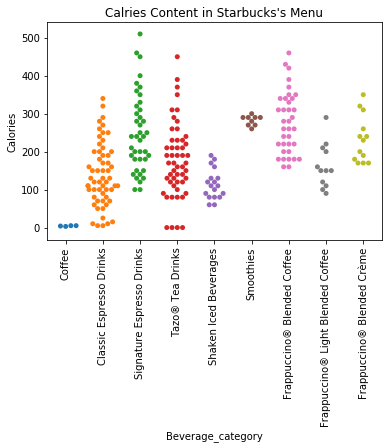

In [46]:
plot=snr.swarmplot(x="Beverage_category",y= "Calories", data=starbucks)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.title("Calries Content in Starbucks's Menu")
plt.show()


# Checking the outliers in Cholesterol by plotting boxplot

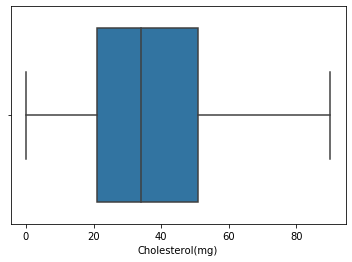

In [47]:
snr.boxplot(x="Cholesterol(mg)", data=starbucks)

# Checking relation between Calories and Cholesterol

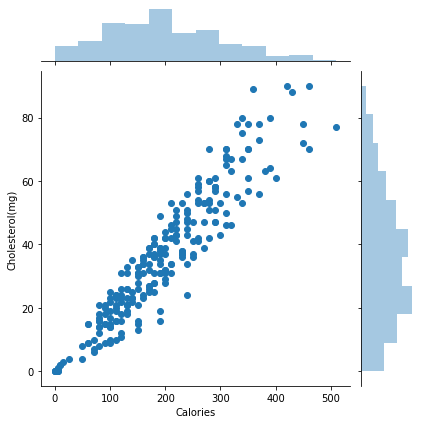

In [49]:
plot=snr.jointplot(x="Calories",y="Cholesterol(mg)", data=starbucks)

# Finding colrrelation between Variables

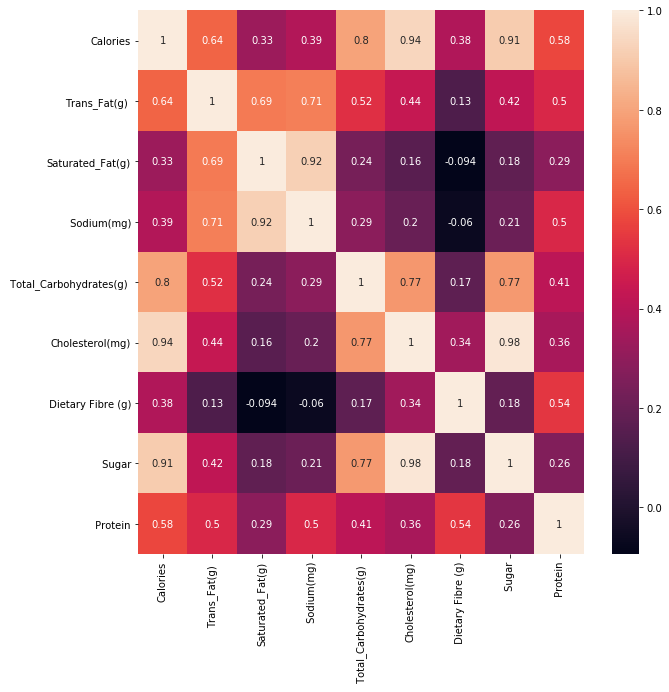

In [48]:
plt.figure(figsize=(10,10))
snr.heatmap(starbucks.corr(),annot=True)